# ICU Patient Data Analysis

NB:

https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction/data

https://www.kaggle.com/code/gsivakumar/step-by-step-approach-for-mortality-prediction/notebook

Outcome: 0 is alive, 1 is death

Gendera: 1 is male, 2 is female

## Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#To prevent warnings from pandas
import warnings
warnings.filterwarnings("ignore")

## First Looks

In [3]:
pd.options.display.float_format = "{:,.2f}".format
df = pd.read_csv('data/ICU_data.csv')

#Preview data
df.head(10)

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.00,72,1,37.59,0,0,0,1,...,138.75,7.46,109.17,13.17,2.62,7.23,21.17,0.50,40.00,55
1,1,139812,0.00,75,2,NaN,0,0,0,0,...,138.89,8.16,98.44,11.44,1.89,7.22,33.44,0.50,78.00,55
2,1,109787,0.00,83,2,26.57,0,0,0,0,...,140.71,8.27,105.86,10.00,2.16,7.27,30.57,0.50,71.50,35
3,1,130587,0.00,43,2,83.26,0,0,0,0,...,138.50,9.48,92.07,12.36,1.94,7.37,38.57,0.60,75.00,55
4,1,138290,0.00,75,2,31.82,1,0,0,0,...,136.67,8.73,104.50,15.17,1.65,7.25,22.00,0.60,50.00,55
5,1,154653,0.00,76,1,24.26,1,1,0,0,...,136.25,8.47,96.75,13.12,1.77,7.31,30.50,0.60,65.50,35
6,1,194420,0.00,72,1,39.67,1,0,0,0,...,144.13,8.78,106.67,15.20,1.88,7.17,26.80,0.62,69.77,55
7,1,153461,0.00,83,2,22.31,1,1,0,1,...,140.00,9.17,104.25,12.57,2.19,7.55,27.57,0.65,31.33,75
8,1,113076,0.00,61,2,19.99,1,1,0,1,...,141.09,9.44,103.18,16.86,2.04,7.36,25.77,0.67,46.00,50
9,1,147252,0.00,67,1,45.03,1,0,0,1,...,142.30,8.15,97.60,12.00,2.20,7.36,36.70,0.70,67.00,55


In [5]:
#Count null rows in each column
df.isna().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

## General Statistics

The median age in America is approximately 38.1 years old. However, ICU patients are expected to be older on average.

In [22]:
df["age"].describe()

count   1,177.00
mean       74.06
std        13.43
min        19.00
25%        65.00
50%        77.00
75%        85.00
max        99.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

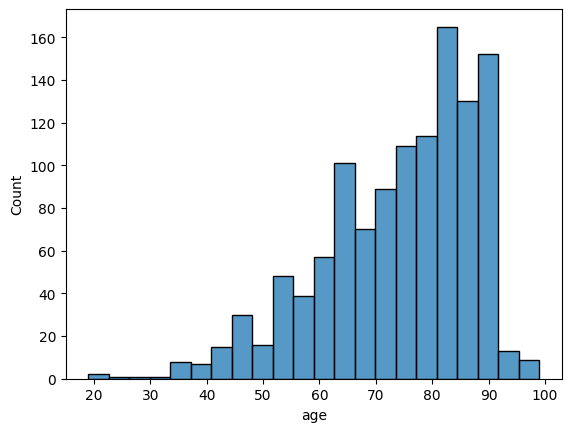

In [26]:
sns.histplot(df["age"])

Indeed, the average ICU patient is 74 years old (and the median is 77). This is significantly older than the general population.

In [23]:
df.loc[df["gendera"] == 1]["age"].describe() #men

count   559.00
mean     72.90
std      13.74
min      19.00
25%      64.00
50%      76.00
75%      84.00
max      98.00
Name: age, dtype: float64

In [25]:
df.loc[df["gendera"] == 2]["age"].describe() #women

count   618.00
mean     75.10
std      13.08
min      19.00
25%      66.00
50%      78.00
75%      86.00
max      99.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

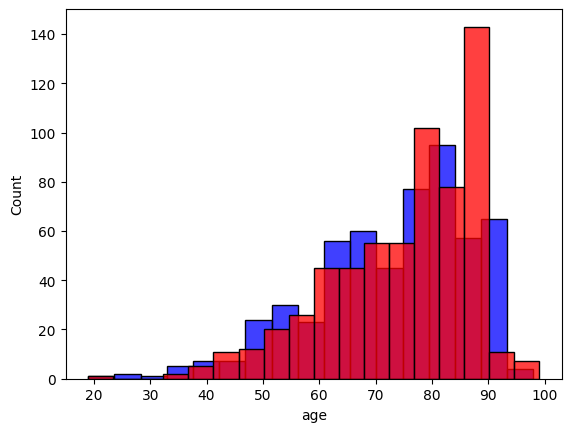

In [30]:
sns.histplot(df.loc[df["gendera"] == 1]["age"], color="blue")
sns.histplot(df.loc[df["gendera"] == 2]["age"], color="red")
#Men will be in blue and women in red.

Women in the ICU are older than men there on average.

## Variable Correlations

In [11]:
#Function to graph two variables versus each other. Spits back best fit line stats
def graph_analysis(data, colx, coly):
    #First remove null data from that column.
    data_not_null = data.loc[data[colx].notnull() & data[coly].notnull()]
    #Plot the data
    plot = sns.regplot(data=data_not_null, x=colx, y=coly)
    #Line of best fit and statistical measurements
    slope, intercept, r, p, sterr = scipy.stats.linregress(x=data_not_null[colx],
                                                        y=data_not_null[coly])
    #Print and display
    print("Equation:", slope, intercept)
    print("r:", r)
    print("p:", p)
    plt.show()

### Blood Pressure vs. Age

Equation: -0.03753789707407826 120.77296893349754
r: -0.02909753978440959
p: 0.3218832206820858


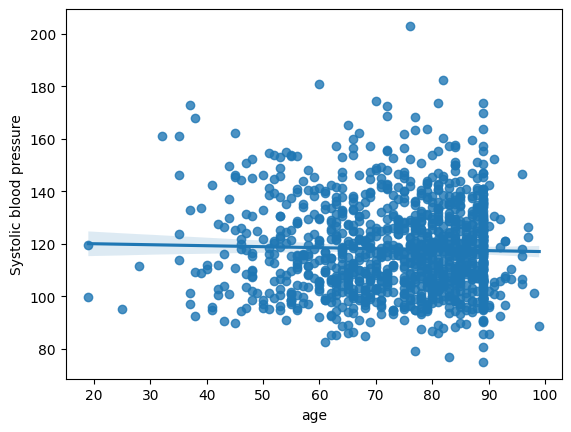

In [14]:
graph_analysis(df, "age", "Systolic blood pressure")

Equation: -0.27362369670144415 79.78359282546484
r: -0.3447614896919465
p: 9.61493897468789e-34


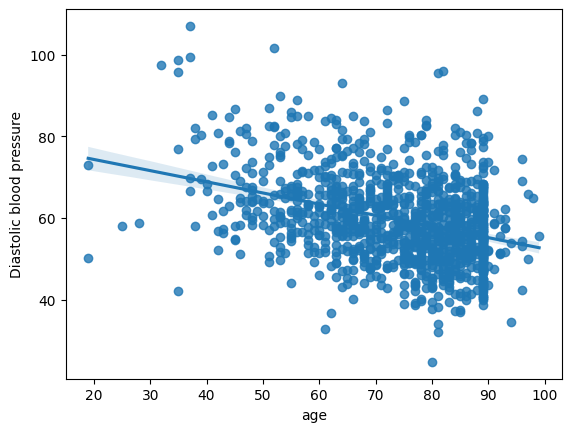

In [16]:
graph_analysis(df, "age", "Diastolic blood pressure")

Although there is no clear correlation between age and systolic blood pressure (measured during heart beats), there is a statistically significant negative correlation between age and diastolic blood pressure (measured in between heart beats). Older patients in this ICU dataset generally have lower diastolic blood pressures.

### Heart Rate vs. Age

Equation: -0.24977154024801423 103.06881308246938
r: -0.20993854259604264
p: 4.632947473076481e-13


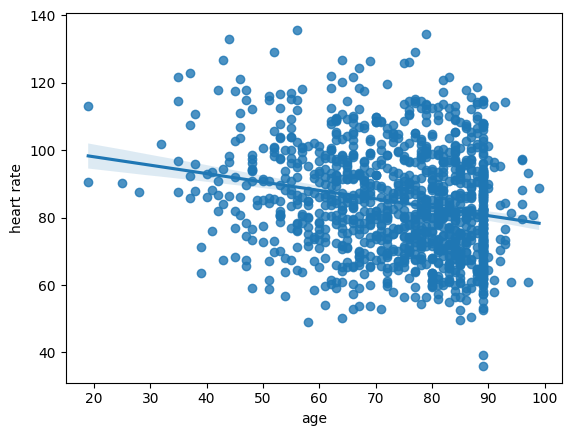

In [17]:
graph_analysis(df, "age", "heart rate")

There is also a negative correlation between age and heart rate. Older patients generally had lower heart rates.